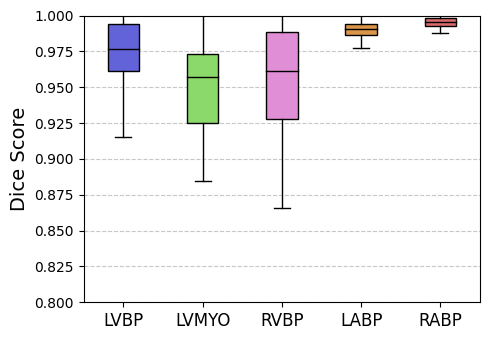

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Generate synthetic data for each category using the provided means and stds
np.random.seed(42)
categories = ['LVBP', 'LVMYO', 'RVBP', 'LABP', 'RABP']
# colors = ['blue', 'lightgreen', 'violet', 'orange', 'red', 'cyan']
colors = ["#6363d9", "#8cd96b", "#e08ed6", "#d9964b", "#d96b6b"]

# Dice scores (mean, std) from LaTeX table
dice_scores = {
    'LVBP': (0.981, 0.033),
    'LVMYO': (0.954, 0.036),
    'RVBP': (0.957, 0.045),
    'LABP': (0.990, 0.0059),
    'RABP': (0.996, 0.0036),
}
data = [np.random.normal(mean, std, 100) for mean, std in dice_scores.values()]

# Create the figure
fig, ax = plt.subplots(figsize=(5, 3.5))

# Box plot
box = ax.boxplot(data, 
                 patch_artist=True,
                  showfliers=False,
                  medianprops=dict(color='black'),
                 widths=0.4)

# Apply colors to each box (cycling through colors if needed)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Formatting
ax.set_xticklabels(categories, fontsize=12, rotation=0)
ax.set_ylabel('Dice Score', fontsize=14)
ax.set_ylim(0.8, 1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Legend (matching colors to categories)
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
# ax.legend(handles, categories, loc='upper center', fontsize=10, bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=True)
# plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=True)

# Show plot
plt.tight_layout()
plt.savefig("results/segmentations/segmentations_plots/dice_score.png")
plt.show()


In [2]:
# dice_scores = {
#     'ViTa(LA)': {'LABP': (0.954, 0.033),
#                  'RABP': (0.984, 0.019)},
#     'ViTa(SA)': {'LVBP': (0.975, 0.025), 
#                  'LVMYO': (0.948, 0.030), 
#                  'RVBP': (0.950, 0.040)},
#     'ViTa':     {'LVBP': (0.981, 0.033), 
#                  'LVMYO': (0.954, 0.036), 
#                  'RVBP': (0.957, 0.045),
#                  'LABP': (0.990, 0.0059), 
#                  'RABP': (0.996, 0.0036)},
#     'nnUNet':   {'LVBP': (0.988, 0.034), 
#                  'LVMYO': (0.967, 0.014), 
#                  'RVBP': (0.975, 0.028),
#                  'LABP': (0.966, 0.042),
#                  'RABP': (0.976, 0.047)},
# }

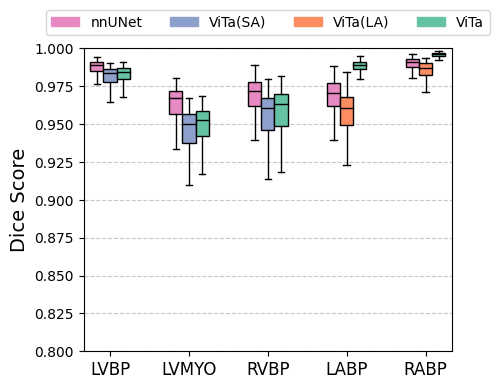

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Setup
categories = ['LVBP', 'LVMYO', 'RVBP', 'LABP', 'RABP']
tick_positions = []
positions = []
box_data = []
box_colors = []

# Color per model
model_colors = {
    'nnUNet':   "#e78ac3",  # Soft pink-purple
    'ViTa(SA)': "#8da0cb",  # Muted blue
    'ViTa(LA)': "#fc8d62",  # Soft orange
    'ViTa':     "#66c2a5",  # Muted green
}

# Dice scores per model and category
nnunet_all_scores_LA = np.load("/vol/unicorn_ssd/users/zyun/Projects/nnUNet/nnunet_all_dice_LA.npy")
nnunet_all_scores_SA = np.load("/vol/unicorn_ssd/users/zyun/Projects/nnUNet/nnunet_all_dice_SA.npy")
mae_all_scores_LA = np.load("/vol/unicorn_ssd/users/zyun/Projects/VisionLanguageLatent/results/segmentations/metric_scores/mae_all_dice_lax.npy")
mae_all_scores_SA = np.load("/vol/unicorn_ssd/users/zyun/Projects/VisionLanguageLatent/results/segmentations/metric_scores/mae_all_dice_sax.npy")
mae_all_scores_ALLAX = np.load("/vol/unicorn_ssd/users/zyun/Projects/VisionLanguageLatent/results/segmentations/metric_scores/mae_all_dice_allax.npy")
mae_all_scores_LA = np.moveaxis(mae_all_scores_LA, -1, 0)
mae_all_scores_SA = np.moveaxis(mae_all_scores_SA, -1, 0)
mae_all_scores_ALLAX = np.moveaxis(mae_all_scores_ALLAX, -1, 0)

all_dice_scores = {
    'ViTa(LA)': {'LABP': mae_all_scores_LA[:, 1],
                 'RABP': mae_all_scores_LA[:, 2]},
    'ViTa(SA)': {'LVBP':  mae_all_scores_SA[:, 1], 
                 'LVMYO': mae_all_scores_SA[:, 2], 
                 'RVBP': mae_all_scores_SA[:, 3]}, 
    'ViTa':     {'LVBP': mae_all_scores_ALLAX[:, 1], 
                 'LVMYO': mae_all_scores_ALLAX[:, 2], 
                 'RVBP': mae_all_scores_ALLAX[:, 3], 
                 'LABP': mae_all_scores_ALLAX[:, 4], 
                 'RABP': mae_all_scores_ALLAX[:, 5]}, 
    'nnUNet':   {'LVBP': nnunet_all_scores_SA[:, 1], 
                 'LVMYO': nnunet_all_scores_SA[:, 2], 
                 'RVBP': nnunet_all_scores_SA[:, 3],
                 'LABP': nnunet_all_scores_LA[:, 1],
                 'RABP': nnunet_all_scores_LA[:, 2]},
}

# Desired order per category
category_model_order = {
    'LVBP': [ 'nnUNet', 'ViTa(SA)', 'ViTa'],
    'LVMYO': [ 'nnUNet', 'ViTa(SA)', 'ViTa'],
    'RVBP': [ 'nnUNet', 'ViTa(SA)', 'ViTa'],
    'LABP': [ 'nnUNet', 'ViTa(LA)', 'ViTa'],
    'RABP': [ 'nnUNet', 'ViTa(LA)', 'ViTa'],
}

group_spacing = 3.0
box_width = 0.5
offset_unit = 0.5  # spacing between boxes within a category

# Build boxplot data
for i, category in enumerate(categories):
    center = i * group_spacing
    tick_positions.append(center)
    
    model_order = category_model_order[category]
    num_models = len(model_order)
    offsets = np.linspace(-offset_unit, offset_unit, num_models)
    
    for offset, model in zip(offsets, model_order):
        if category in all_dice_scores[model]:
            data = all_dice_scores[model][category]

            box_data.append(data)
            positions.append(center + offset)
            box_colors.append(model_colors[model])

# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

box = ax.boxplot(box_data,
                 positions=positions,
                 patch_artist=True,
                 widths=box_width,
                 showfliers=False,
                 medianprops=dict(color='black'))

for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

# Formatting
ax.set_xticks(tick_positions)
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylabel("Dice Score", fontsize=14)
ax.set_ylim(0.8, 1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in model_colors.values()]
ax.legend(legend_handles, list(model_colors.keys()),
          loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=True)

plt.tight_layout()
plt.savefig("results/segmentations/segmentations_plots/dice_score_baseline.png", dpi=600)
plt.show()


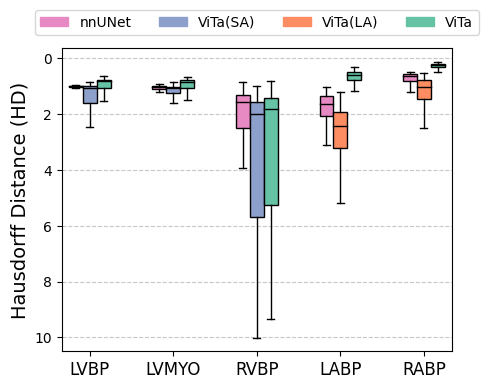

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
categories = ['LVBP', 'LVMYO', 'RVBP', 'LABP', 'RABP']
tick_positions = []
positions = []
box_data = []
box_colors = []

# Color per model
model_colors = {
    'nnUNet':   "#e78ac3",  # Soft pink-purple
    'ViTa(SA)': "#8da0cb",  # Muted blue
    'ViTa(LA)': "#fc8d62",  # Soft orange
    'ViTa':     "#66c2a5",  # Muted green
}

# Dice scores per model and category
nnunet_all_scores_LA = np.load("/vol/unicorn_ssd/users/zyun/Projects/nnUNet/nnunet_all_hd95_LA.npy")
nnunet_all_scores_SA = np.load("/vol/unicorn_ssd/users/zyun/Projects/nnUNet/nnunet_all_hd95_SA.npy")
mae_all_scores_LA = np.load("/vol/unicorn_ssd/users/zyun/Projects/VisionLanguageLatent/results/segmentations/metric_scores/mae_all_hd95_lax.npy")
mae_all_scores_SA = np.load("/vol/unicorn_ssd/users/zyun/Projects/VisionLanguageLatent/results/segmentations/metric_scores/mae_all_hd95_sax.npy")
mae_all_scores_ALLAX = np.load("/vol/unicorn_ssd/users/zyun/Projects/VisionLanguageLatent/results/segmentations/metric_scores/mae_all_hd95_allax.npy")

nnunet_all_scores_LA = np.mean(nnunet_all_scores_LA, axis=1)
nnunet_all_scores_SA = np.mean(nnunet_all_scores_SA, axis=1)
mae_all_scores_LA = np.moveaxis(mae_all_scores_LA, -1, 0)
mae_all_scores_SA = np.moveaxis(mae_all_scores_SA, -1, 0)
mae_all_scores_ALLAX = np.moveaxis(mae_all_scores_ALLAX, -1, 0)

all_hd95_scores = {
    'ViTa(LA)': {'LABP': mae_all_scores_LA[:, 1],
                 'RABP': mae_all_scores_LA[:, 2]},
    'ViTa(SA)': {'LVBP':  mae_all_scores_SA[:, 1], 
                 'LVMYO': mae_all_scores_SA[:, 2], 
                 'RVBP': mae_all_scores_SA[:, 3]}, 
    'ViTa':     {'LVBP': mae_all_scores_ALLAX[:, 1], 
                 'LVMYO': mae_all_scores_ALLAX[:, 2], 
                 'RVBP': mae_all_scores_ALLAX[:, 3], 
                 'LABP': mae_all_scores_ALLAX[:, 4], 
                 'RABP': mae_all_scores_ALLAX[:, 5]}, 
    'nnUNet':   {'LVBP': nnunet_all_scores_SA[:, 1], 
                 'LVMYO': nnunet_all_scores_SA[:, 2], 
                 'RVBP': nnunet_all_scores_SA[:, 3],
                 'LABP': nnunet_all_scores_LA[:, 1],
                 'RABP': nnunet_all_scores_LA[:, 2]},
}

# Desired order per category
category_model_order = {
    'LVBP': [ 'nnUNet', 'ViTa(SA)', 'ViTa'],
    'LVMYO': [ 'nnUNet', 'ViTa(SA)', 'ViTa'],
    'RVBP': [ 'nnUNet', 'ViTa(SA)', 'ViTa'],
    'LABP': [ 'nnUNet', 'ViTa(LA)', 'ViTa'],
    'RABP': [ 'nnUNet', 'ViTa(LA)', 'ViTa'],
}

group_spacing = 3.0
box_width = 0.5
offset_unit = 0.5  # spacing between boxes within a category

# Build boxplot data
for i, category in enumerate(categories):
    center = i * group_spacing
    tick_positions.append(center)
    
    model_order = category_model_order[category]
    num_models = len(model_order)
    offsets = np.linspace(-offset_unit, offset_unit, num_models)
    
    for offset, model in zip(offsets, model_order):
        if category in all_hd95_scores[model]:
            data = all_hd95_scores[model][category]

            box_data.append(data)
            positions.append(center + offset)
            box_colors.append(model_colors[model])

# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

box = ax.boxplot(box_data,
                 positions=positions,
                 patch_artist=True,
                 widths=box_width,
                 showfliers=False,
                 medianprops=dict(color='black'))

for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

# Formatting
ax.set_xticks(tick_positions)
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylabel("Hausdorff Distance (HD)", fontsize=14)
# ax.set_ylim(0.8, 1)
ax.invert_yaxis()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in model_colors.values()]
ax.legend(legend_handles, list(model_colors.keys()),
          loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=True)

plt.tight_layout()
plt.savefig("results/segmentations/segmentations_plots/hd95_baseline.png", dpi=600)
plt.show()


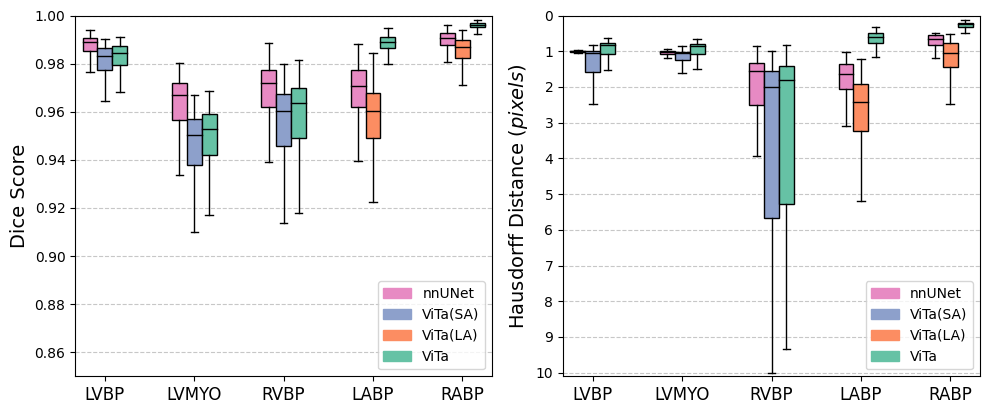

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Setup -----
categories = ['LVBP', 'LVMYO', 'RVBP', 'LABP', 'RABP']
group_spacing = 3.0
box_width = 0.5
offset_unit = 0.5

model_colors = {
    'nnUNet':   "#e78ac3",
    'ViTa(SA)': "#8da0cb",
    'ViTa(LA)': "#fc8d62",
    'ViTa':     "#66c2a5",
}

category_model_order = {
    'LVBP': ['nnUNet', 'ViTa(SA)', 'ViTa'],
    'LVMYO': ['nnUNet', 'ViTa(SA)', 'ViTa'],
    'RVBP': ['nnUNet', 'ViTa(SA)', 'ViTa'],
    'LABP': ['nnUNet', 'ViTa(LA)', 'ViTa'],
    'RABP': ['nnUNet', 'ViTa(LA)', 'ViTa'],
}

def build_box_data(all_scores):
    tick_positions, positions, box_data, box_colors = [], [], [], []
    
    for i, category in enumerate(categories):
        center = i * group_spacing
        tick_positions.append(center)
        
        model_order = category_model_order[category]
        num_models = len(model_order)
        offsets = np.linspace(-offset_unit, offset_unit, num_models)
        
        for offset, model in zip(offsets, model_order):
            if category in all_scores[model]:
                data = all_scores[model][category]
                box_data.append(data)
                positions.append(center + offset)
                box_colors.append(model_colors[model])
    
    return tick_positions, positions, box_data, box_colors

# ---- Load data here (same as you already have above) ----
# Assume all_dice_scores and all_hd95_scores are already prepared as in your message

# ---- Plotting ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 1]})


# --- Dice plot ---
tick_positions, positions, box_data, box_colors = build_box_data(all_dice_scores)
box1 = ax1.boxplot(box_data, positions=positions, patch_artist=True,
                   widths=box_width, showfliers=False,
                   medianprops=dict(color='black'))
for patch, color in zip(box1['boxes'], box_colors):
    patch.set_facecolor(color)

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(categories, fontsize=12)
ax1.set_ylabel("Dice Score", fontsize=14)
# ax1.set_title("Dice Score", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0.85, 1.0)

# --- HD95 plot ---
tick_positions, positions, box_data, box_colors = build_box_data(all_hd95_scores)
box2 = ax2.boxplot(box_data, positions=positions, patch_artist=True,
                   widths=box_width, showfliers=False,
                   medianprops=dict(color='black'))
for patch, color in zip(box2['boxes'], box_colors):
    patch.set_facecolor(color)

ax2.set_xticks(tick_positions)
ax2.set_xticklabels(categories, fontsize=12)
ax2.set_ylabel(r"Hausdorff Distance ($\mathit{pixels}$)", fontsize=14)

# ax2.set_title("HD95", fontsize=14)
# ax2.set_yscale('log')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(bottom=1e-2, top=10.1)
ax2.set_yticks(np.arange(0, 11, 1))
ax2.invert_yaxis()

# --- Shared Legend ---
# legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in model_colors.values()]
# fig.legend(legend_handles, list(model_colors.keys()),
#            loc='upper center', bbox_to_anchor=(0.5, 0.99),
#            ncol=4, frameon=True, fontsize=12)

handles_all = [plt.Rectangle((0, 0), 1, 1, color=model_colors[m]) for m in model_colors]
ax1.legend(handles_all, list(model_colors.keys()),
           loc='lower right', fontsize=10, frameon=True)

# HD95 plot legend (bottom right)
ax2.legend(handles_all, list(model_colors.keys()),
           loc='lower right', fontsize=10, frameon=True)



plt.tight_layout(rect=[0, -0.03, 1, 1.03])  # leave space for legend
plt.savefig("results/segmentations/segmentations_plots/dice_hd95_combined.png", dpi=600)
plt.show()


# Crop the predicted segmentation maps and ground truth

In [18]:
from pathlib import Path
from PIL import Image
import numpy as np

all_pred_path = Path("results/segmentations/pred_seg_maps")

# Short-axis
mae_sax_path = all_pred_path / "mae_sax"
nnunet_sax_path = all_pred_path / "nnunet_sax"
path_list = [mae_sax_path, nnunet_sax_path]
name_list = ["mae_sax", "nnunet_sax"]
save_root_path = Path("results/segmentations/selected_seg_maps")
for root_path, name in zip(path_list, name_list):
    for i in range(30):
        for k in range(6):
            for t in range(50):
                if (i,k,t) in [(13, 0, 42), (15, 2, 13), (25, 5, 17)]:
                    gt_img_path = root_path / str(i) / f"gt_{i}_s{k}_t{t}.png"
                    save_gt_path = save_root_path / f"{name}_gt_{i}_s{k}_t{t}_cropped.png"

                    gt_img = Image.open(gt_img_path).convert("RGB")
                    gt_img_np = np.array(gt_img)
                    gt_cropped = gt_img_np[64 - 40:64 + 40, :, :]  # shape becomes (90, W, 3)
                    Image.fromarray(gt_cropped).save(save_gt_path)

                    pred_img_path = root_path / str(i) / f"pred_{i}_s{k}_t{t}.png"
                    save_pred_path = save_root_path / f"{name}_pred_{i}_s{k}_t{t}_cropped.png"

                    pred_img = Image.open(pred_img_path).convert("RGB")
                    pred_img_np = np.array(pred_img)
                    pred_cropped = pred_img_np[64 - 40:64 + 40, :, :]  # shape becomes (90, W, 3)
                    Image.fromarray(pred_cropped).save(save_pred_path)

In [29]:
# Long-axis
mae_lax_path = all_pred_path / "mae_lax"
nnunet_lax_path = all_pred_path / "nnunet_lax"
path_list = [mae_lax_path, nnunet_lax_path]
name_list = ["mae_lax", "nnunet_lax"]
save_root_path = Path("results/segmentations/selected_seg_maps")
for root_path, name in zip(path_list, name_list):
    for i in range(30):
        for k in range(3):
            for t in range(50):
                if (i,k,t) in [(23, 0, 2), (17, 2, 17)]:
                    gt_img_path = root_path / str(i) / f"gt_{i}_s{k}_t{t}.png"
                    save_gt_path = save_root_path / f"{name}_gt_{i}_s{k}_t{t}_cropped.png"
                    gt_img = Image.open(gt_img_path).convert("RGB")
                    gt_img_np = np.array(gt_img)
                    if k == 2:
                        gt_cropped = gt_img_np[55 - 40:55 + 40, :, :]  # Move the 4 chamber crop window up
                    else:
                        gt_cropped = gt_img_np[64 - 40:64 + 40, :, :]  # shape becomes (90, W, 3)
                    Image.fromarray(gt_cropped).save(save_gt_path)

                    pred_img_path = root_path / str(i) / f"pred_{i}_s{k}_t{t}.png"
                    save_pred_path = save_root_path / f"{name}_pred_{i}_s{k}_t{t}_cropped.png"

                    pred_img = Image.open(pred_img_path).convert("RGB")
                    pred_img_np = np.array(pred_img)
                    if k == 2:
                        pred_cropped = pred_img_np[55 - 40:55 + 40, :, :]  # Move the 4 chamber crop window up
                    else:
                        pred_cropped = pred_img_np[64 - 40:64 + 40, :, :]  # shape becomes (90, W, 3)
                    Image.fromarray(pred_cropped).save(save_pred_path)

In [28]:
# All-axis
root_path = all_pred_path / "mae"
save_root_path = Path("results/segmentations/selected_seg_maps")
for i in range(30):
    for k in range(9):
        for t in range(50):
            if (i,k,t) in [(23, 0, 2), (17, 2, 17), (13, 3, 42), (15, 5, 13), (25, 8, 17)]:
                gt_img_path = root_path / str(i) / f"gt_{i}_s{k}_t{t}.png"
                save_gt_path = save_root_path / f"mae_gt_{i}_s{k}_t{t}_cropped.png"
                gt_img = Image.open(gt_img_path).convert("RGB")
                gt_img_np = np.array(gt_img)
                if k == 2:
                    gt_cropped = gt_img_np[55 - 40:55 + 40, :, :]  # Move the 4 chamber crop window up
                else:
                    gt_cropped = gt_img_np[64 - 40:64 + 40, :, :]  # shape becomes (90, W, 3)
                Image.fromarray(gt_cropped).save(save_gt_path)

                pred_img_path = root_path / str(i) / f"pred_{i}_s{k}_t{t}.png"
                save_pred_path = save_root_path / f"mae_pred_{i}_s{k}_t{t}_cropped.png"

                pred_img = Image.open(pred_img_path).convert("RGB")
                pred_img_np = np.array(pred_img)
                if k == 2:
                    pred_cropped = pred_img_np[55 - 40:55 + 40, :, :]  # Move the 4 chamber crop window up
                else:
                    pred_cropped = pred_img_np[64 - 40:64 + 40, :, :]  # shape becomes (90, W, 3)
                Image.fromarray(pred_cropped).save(save_pred_path)